1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

### Cargamos librerias

In [11]:
import numpy as np
import pandas as pd 

### Cargamos dataset

In [12]:
df = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/data_science_jun_2020/week8/day4/data/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Metodo KNN

* [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3] para k=3 y k=7

target --> variety

In [15]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Comprobamos que hay tres clases de planta

In [ ]:
Convertimos los  string labels en números

In [22]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
variety_encoded = le.fit_transform(df.variety)
# Sunny: 2, Overcast: 0, Rainy:1
print(variety_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
sepal_length_encoded = le.fit_transform(df["sepal.length"])
sepal_width_encoded = le.fit_transform(df["sepal.width"])
petal_lenght_encoded = le.fit_transform(df["petal.length"])
petal_width_encoded = le.fit_transform(df["petal.width"])
y = le.fit_transform(df.variety)

In [27]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Transformo en array las variables:

In [28]:
sepal_length_encoded = np.array(sepal_length_encoded)
sepal_width_encoded = np.array(sepal_width_encoded)
petal_lenght_encoded = np.array(petal_lenght_encoded)
petal_width_encoded = np.array(petal_width_encoded)
y = np.array(y)

In [29]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
X = np.array(list(zip(sepal_length_encoded, sepal_width_encoded, petal_lenght_encoded, petal_width_encoded)))


Divido el conjunto de datos:

In [32]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


### Genero el modelo K=3:

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

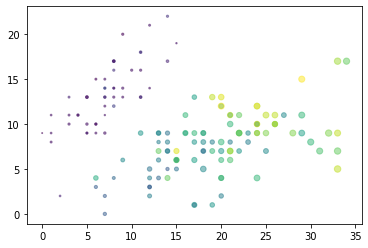

In [34]:
import matplotlib.pyplot as plt

plt.scatter(sepal_length_encoded, sepal_width_encoded, petal_lenght_encoded, petal_width_encoded, alpha=0.5)

Predecimos el modelo:

In [35]:
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[1]


In [36]:
predicted2 = model.predict([[1.7,3.8,4.5,11.3 ]]) 
print(predicted2)

[1]


In [40]:
model1 = model.kneighbors([(15.7,2.8,9.5,0.1)], return_distance=True) 
model1

(array([[6.69253315, 7.79679421, 9.03271831]]), array([[76, 11,  6]]))

In [41]:
model2 = model.kneighbors([(1.7,3.8,4.5,11.3 )], return_distance=True) 
model2

(array([[8.80170438, 8.85832941, 9.46942448]]), array([[ 8, 46, 63]]))

In [42]:
X_test.shape

(38, 4)

In [43]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0])

In [44]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


### Genero el modelo K=7:

In [45]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[1]


In [48]:
predicted2 = model.predict([[1.7,3.8,4.5,11.3 ]]) 
print(predicted2)

[1]


In [49]:
model3 = model.kneighbors([(15.7,2.8,9.5,0.1)], return_distance=True) 
model3

(array([[ 6.69253315,  7.79679421,  9.03271831,  9.30537479, 10.42065257,
         10.5541461 , 10.94486181]]),
 array([[76, 11,  6, 97, 46, 63, 26]]))

In [50]:
model4 = model.kneighbors([(15.7,2.8,9.5,0.1)], return_distance=True) 
model4

(array([[ 6.69253315,  7.79679421,  9.03271831,  9.30537479, 10.42065257,
         10.5541461 , 10.94486181]]),
 array([[76, 11,  6, 97, 46, 63, 26]]))

In [51]:
X_test.shape

(38, 4)

In [52]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0])

In [53]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


#### ¿Qué acierto tiene tu modelo para k=3, k=7? (score)


In [ ]:
Para k=3 Score = 97.36 %
Para k=7 Score = 94.73 %

#### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.


([<matplotlib.axis.XTick at 0x7ffc6ecbd100>,
 <a list of 5 Text major ticklabel objects>)

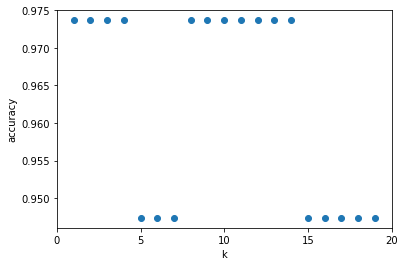

In [54]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
Según la gráfica cuando k es 1,2,3,4,8,9,10,11,12,13 y 14.

#### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [57]:
model6 = KNeighborsClassifier(n_neighbors=7)
model6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
model6.score(X_test, y_test)

0.95

Cambian los resultados porque cambiamos el porcentaje de conjunto de entrenamiento y test.

#### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [63]:
df2= df.drop(df[df.variety=="Setosa"].index, axis=0)



In [64]:
df2

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [66]:
df2.variety.unique()

array(['Versicolor', 'Virginica'], dtype=object)

In [67]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
variety2_encoded = le.fit_transform(df2.variety)
# Sunny: 2, Overcast: 0, Rainy:1
print(variety2_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [68]:
sepal_length_encoded2 = le.fit_transform(df2["sepal.length"])
sepal_width_encoded2 = le.fit_transform(df2["sepal.width"])
petal_lenght_encoded2 = le.fit_transform(df2["petal.length"])
petal_width_encoded2 = le.fit_transform(df2["petal.width"])
y2 = le.fit_transform(df2.variety)

In [69]:
sepal_length_encoded2 = np.array(sepal_length_encoded2)
sepal_width_encoded2 = np.array(sepal_width_encoded2)
petal_lenght_encoded2 = np.array(petal_lenght_encoded2)
petal_width_encoded2 = np.array(petal_width_encoded2)
y2 = np.array(y2)

In [70]:
X2 = np.array(list(zip(sepal_length_encoded2, sepal_width_encoded2, petal_lenght_encoded2, petal_width_encoded2)))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(75, 4)
(25, 4)


In [78]:
model2 = KNeighborsClassifier(n_neighbors=3)

model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
predicted2 = model2.predict([[15.7,2.8,9.5,0.1]])
predicted2


array([0])

In [80]:
model2 = model2.kneighbors([(15.7,2.8,9.5,0.1)], return_distance=True) 
model2

(array([[4.31161223, 6.212085  , 6.47996914]]), array([[44, 23, 24]]))

In [81]:
X_test.shape

(25, 4)

In [85]:
y_pred = model.predict(X_test)
y_pred

array([0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 0])

In [86]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56


In [ ]:
Cambia considerablemente los resultados.
Es bueno para los datos anteriores pero no si eliminas la Setosa. el procentaje baja al 56 %